In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
x = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

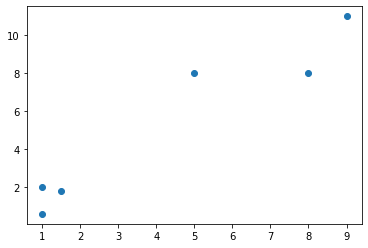

In [12]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [19]:
def fit(data, k=2, max_iter = 100):
    means = []
    # randomly initialize the means
    for i in range(k):
        means.append(data[i])
        # we assigned first k data as initial mean
    for i in range(max_iter):
        # create empty clusters
        clusters = []
        for j in range(k):
            clusters.append([])
        # assign the data points to the cluster that they belong to
        for point in data:
            # find distance to all the mean values
            distances = [((point-m)**2).sum() for m in means]
            # find the min distance 
            minDistance = min(distances)
            # find the mean for which we got min distance --> l
            l = distances.index(minDistance)
            # add the point to cluster l
            clusters[l].append(point)

        # calculate the new mean values
        change = False
        for j in range(k):
            new_mean = np.average(clusters[j], axis = 0)
            if not np.array_equal(means[j], new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
    return means

In [21]:
def predict(test_data, means):
    predictions = []
    for point in test_data:
        # find distance to all the mean values
        distances = [((point-m)**2).sum() for m in means]
        # find the min distance 
        minDistance = min(distances)
        # find the mean for which we got min distance --> l
        l = distances.index(minDistance)
        # add the point to cluster l
        predictions.append(l)
    return predictions

In [22]:
means = fit(x)

In [25]:
predict(x,means)

[0, 0, 1, 1, 0, 1]

## Implementing KMeans Class:-

In [42]:
class K_Means:
    def __init__ (self, k=2, max_iter = 100):
        print("K_Mean initialized")
        self.k = k
        self.max_iter = max_iter
        
    def fit(self, data):
        self.means = []
        # randomly initialize the means
        for i in range(self.k):
            self.means.append(data[i])
            # we assigned first k data as initial mean
        for i in range(self.max_iter):
            # create empty clusters
            clusters = []
            for j in range(self.k):
                clusters.append([])
            # assign the data points to the cluster that they belong to
            for point in data:
                # find distance to all the mean values
                distances = [((point-m)**2).sum() for m in self.means]
                # find the min distance 
                minDistance = min(distances)
                # find the mean for which we got min distance --> l
                l = distances.index(minDistance)
                # add the point to cluster l
                clusters[l].append(point)

            # calculate the new mean values
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis = 0)
                if not np.array_equal(self.means[j], new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break
                
    def predict(self, test_data):
        predictions = []
        for point in test_data:
            # find distance to all the mean values
            distances = [((point-m)**2).sum() for m in self.means]
            # find the min distance 
            minDistance = min(distances)
            # find the mean for which we got min distance --> l
            l = distances.index(minDistance)
            # add the point to cluster l
            predictions.append(l)
        return predictions

In [43]:
kmeans = K_Means()

K_Mean initialized


In [44]:
kmeans.fit(x)

In [45]:
kmeans.predict(x)

[0, 0, 1, 1, 0, 1]

In [46]:
kmeans.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]